<a href="https://colab.research.google.com/github/Showcas/NLP/blob/main/02_1_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing with LLMs

## scikit-learn

**scikit-learn** is a very good third-party module for Machine Learning.

It is called _scikit-learn_, the module is called `sklearn`. The very well written and extensive documentation is at https://scikit-learn.org.

---

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!pip install scikit-learn
!pip install matplotlib

In [3]:
import sklearn

print(sklearn.__version__)


# Also, we again use tqdm for progress bars
from tqdm.auto import tqdm

1.6.1


In [4]:
# There are also a few datasets that are already included:

from sklearn.datasets import fetch_20newsgroups

train_set = fetch_20newsgroups(
    # we limit it to three categories for simplicity
    categories=('sci.electronics', 'sci.space', 'sci.crypt'),
    remove=('headers', 'footers', 'quotes'),
    subset='train'
)

In [5]:
# We can get the list of all labels with the property `target_names`:

print(train_set.target_names)

['sci.crypt', 'sci.electronics', 'sci.space']


#### In this example, we'll use all the categories/classes/labels/target names.

The data is already split into **TEXT** and **LABEL** by the properties: `.data` and `.target`. So, we don't need to take care of the label ourself.

The `target` is now not a `str` but `int` which is the **index** where in the `.target_names` property the correct string is.

In [6]:
# Example text:
print(f"Label as int: '{train_set.target[40]}'")
print(f"Label as str: '{train_set.target_names[train_set.target[40]]}'")
print(f"Text: '{train_set.data[40]}'")

Label as int: '0'
Label as str: 'sci.crypt'
Text: '
David,

  As an economist, I'm sure you can see the flaws in this logic. If the (naive)
market is flooded with proprietary, but weak, encryption, then truly strong 
encryption will be unable to compete. Suppose the govt had a secret TV broadcast
standard, and then sold TVs below cost. Private industry has a better standard,
but it's not as widespread due to the govt early flooding of the market
with cheap proprietary sets. Even though the industry's technology is better,
the programming is being broadcast to the govt's unduplicatable standard.
Who could compete?

  The other flaw, of course, is that making something voluntary today ensures
that it will be voluntary in the future. I went to renew my CA drivers license
last week and was required not only to give my SSN, but to PRODUCE AN SSN
CARD to veryify the number!  Note that a federal law once said that no state
or local govt could ever require the use of SSNs for drivers license r

## Preprocessing

We need, again, a preprocess function but now, we want something more elegant than the `.split()` function. We could either use `nltk` or use `sklearn`. For the moment, `nltk` might be more straight-forward.

In [7]:
from nltk.corpus import stopwords
from string import punctuation

STOPWORDS = set(
      stopwords.words('english')
    ).union(
        set(punctuation)
    ).union(
        set(['``', "''"])
)
STEMMER = nltk.SnowballStemmer('english')

This is similar to the last notebook but now, the function takes a list of texts instead of one single text.

Also, we do not lemmatize in this example because it takes too long for the full data (20-30 minutes).

#### TASK 2.1

Write a preprocessing function to preprocess one single text. The function should expect one single string as input. The output should be a list of lowercase tokens that do not appear in the STOPWORDS set.
1. Tokenizes the input text into words.
2. Converts each word to lowercase.
3. Filters out words that are in the STOPWORDS set.
4. Applies stemming to the remaining words.

In [16]:
import nltk
nltk.download('punkt_tab')

def preprocess( text: str ) -> list[str]:
    """
    Function to preprocess one single text. It expects one single string as input.
    The output is a list of lowercase tokens that do not appear in the STOPWORDS set.
    """
    ### IMPLEMENT YOUR SOLUTION HERE ###

    tokens = [
        STEMMER.stem(token.lower())
        for token in nltk.word_tokenize(text)
        if token.lower() not in STOPWORDS
    ]


    return tokens

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
# Example:
preprocess(train_set.data[1])

# Output should be:
# ['remark',
#  'heard',
#  'day',
#  'begin',
#  'take',
#  'increas',
#  'frighten',
#  'signific',
#  'comment',
# ...]


['remark',
 'heard',
 'day',
 'begin',
 'take',
 'increas',
 'frighten',
 'signific',
 'comment',
 'made',
 'part',
 'world',
 'democrat',
 'note',
 'big',
 'would',
 'known',
 'socialist',
 'note',
 'small',
 'democrat',
 'wonder',
 'thoma',
 'jefferson',
 '250th',
 'anniversari',
 'birth',
 'would',
 'thought',
 'state',
 'affair',
 'govern',
 'govern',
 '--',
 '--',
 '--',
 'view',
 'express',
 'employ',
 '--',
 '--',
 '--',
 '--',
 'steven',
 'c.',
 'johnson',
 'wb3iru',
 'vk2gds',
 'trw',
 'johnson',
 'trwacs.fp.trw.com',
 'fp1',
 '3133',
 '129.193.172.90',
 '1',
 'feder',
 'system',
 'park',
 'drive',
 'phone',
 '+1',
 '703',
 '968.1000',
 'fairfax',
 'virginia',
 '22033-4412',
 'u.s.a.',
 'fax',
 '+1',
 '703',
 '803.5189']

## Feature Extraction

We could use a simple bag-of-words approach, but we can do it a little bit more efficient with scikit-learn.

We have the [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) class that does the bag-of-words for us: Counting different tokens. It is called a **Vectorizer** because the output is a **vector**.

There other vectorizers as well, but we start off with this very simple one. For text specifically, you can find more [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text).

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# we set token_pattern=None to get rid of a warning, and use our own tokenizer function
# due do using our own tokenizer we don't need to care about token_pattern
vectorizer = CountVectorizer(tokenizer=preprocess, token_pattern=None)

train_extracted = vectorizer.fit_transform(train_set.data)  # generate BoW and transform data

#### How does the data look like now?

In [20]:
train_extracted

<1779x23181 sparse matrix of type '<class 'numpy.int64'>'
	with 134727 stored elements in Compressed Sparse Row format>


It is a __sparse__ matrix. There are **1'779** rows and **23'199** columns.

#### Sparse
Most values are 0, so to store it efficiently without requiring much memory, it's stored in sparse format.


#### Rows:
Each document is represented in a row.

#### Columns:
Each __token__ (word) is a column. The value in the cell represents the __number of appearances__ of this word in the specific document.

(That's why most values are 0, most words out of the vocabulary of ~23k words do not appear in every document.)

In [21]:
print(f'Vocabulary size: {len(vectorizer.vocabulary_):_}')

Vocabulary size: 23_181


In [22]:
print(f'Example words: {list(vectorizer.vocabulary_.keys())[40:50]}')

Example words: ['higher', 'learn', 'wish', 'make', 'counter', 'challeng', 'anoth', 'school', 'say', 'like']


The __instance property__ `.vocabulary_` is a Dictionary: token → column

In [23]:
# Example:

print(vectorizer.vocabulary_['make'])

# The word 'make' is in column 14'262.

14252


In [24]:
# example document
print("Original".upper())
print((sep := "--------------------------------"))
print(train_set.data[1].strip())
print(sep)
print()

ORIGINAL
--------------------------------
A remark I heard the other day is beginning to take on increasingly
frightening significance.  The comment was made that "In other parts
of the world the Democrats [note the big "D"] would be known as
Socialists" 

  A [note the small "d"] democrat who wonders what Thomas Jefferson, on
this the 250th anniversary of his birth, would have thought of the state
of affairs between the government and the governed.


------- Any views expressed are those of myself and not my employer. --------
Steven C. Johnson, WB3IRU / VK2GDS      |
TRW                                     | johnson@trwacs.fp.trw.com
FP1 / 3133                              |         [129.193.172.90]
1 Federal Systems Park Drive            | Phone:        +1 (703) 968.1000
Fairfax, Virginia  22033-4412  U.S.A.   | Fax:          +1 (703) 803.5189
--------------------------------



In [25]:
# same document, but tokenized
print('Tokenized:'.upper())
print(sep)
print(preprocess(train_set.data[1]))
print(sep)

TOKENIZED:
--------------------------------
['remark', 'heard', 'day', 'begin', 'take', 'increas', 'frighten', 'signific', 'comment', 'made', 'part', 'world', 'democrat', 'note', 'big', 'would', 'known', 'socialist', 'note', 'small', 'democrat', 'wonder', 'thoma', 'jefferson', '250th', 'anniversari', 'birth', 'would', 'thought', 'state', 'affair', 'govern', 'govern', '--', '--', '--', 'view', 'express', 'employ', '--', '--', '--', '--', 'steven', 'c.', 'johnson', 'wb3iru', 'vk2gds', 'trw', 'johnson', 'trwacs.fp.trw.com', 'fp1', '3133', '129.193.172.90', '1', 'feder', 'system', 'park', 'drive', 'phone', '+1', '703', '968.1000', 'fairfax', 'virginia', '22033-4412', 'u.s.a.', 'fax', '+1', '703', '803.5189']
--------------------------------


In [26]:
print('Feature Vector for Document 1')
print(sep)
print(train_extracted[1])

Feature Vector for Document 1
--------------------------------
  (0, 19490)	1
  (0, 20014)	1
  (0, 18158)	1
  (0, 11700)	1
  (0, 8576)	1
  (0, 6238)	1
  (0, 20575)	1
  (0, 12450)	1
  (0, 10765)	1
  (0, 19332)	1
  (0, 7723)	1
  (0, 14204)	1
  (0, 16563)	1
  (0, 22763)	1
  (0, 8766)	2
  (0, 15837)	2
  (0, 6363)	1
  (0, 22778)	2
  (0, 13373)	1
  (0, 19564)	1
  (0, 22735)	1
  (0, 20888)	1
  (0, 12960)	1
  (0, 2708)	1
  (0, 5488)	1
  :	:
  (0, 20080)	1
  (0, 6906)	1
  (0, 13027)	2
  (0, 22445)	1
  (0, 22198)	1
  (0, 21301)	1
  (0, 21302)	1
  (0, 10691)	1
  (0, 2985)	1
  (0, 1737)	1
  (0, 1086)	1
  (0, 10332)	1
  (0, 20506)	1
  (0, 16553)	1
  (0, 9274)	1
  (0, 16855)	1
  (0, 26)	2
  (0, 3924)	2
  (0, 4424)	1
  (0, 10230)	1
  (0, 22179)	1
  (0, 2584)	1
  (0, 21415)	1
  (0, 10305)	1
  (0, 4132)	1


In [27]:
# Let's look at a few example values:

print('Number of occurences of "take" in document 1:', train_extracted[1, vectorizer.vocabulary_['take']])

print('Number of occurences of "comment" in document 1:', train_extracted[1, vectorizer.vocabulary_['comment']])

print('Number of occurences of "yes" in document 1:', train_extracted[1, vectorizer.vocabulary_['yes']])

Number of occurences of "take" in document 1: 1
Number of occurences of "comment" in document 1: 1
Number of occurences of "yes" in document 1: 0


In [28]:
# Try with top-500 words
vectorizer = CountVectorizer(tokenizer=preprocess, max_features=500, token_pattern=None)

vectorizer.fit(train_set.data)

train_extracted = vectorizer.transform(train_set.data)

In [29]:
# Check shape
train_extracted.shape

(1779, 500)

Now, we can use any `sklearn` classifier to train with this information.

- Naive Bayes
- Logistic Regression
- Support Vector Machine
- …

In [30]:
from sklearn.naive_bayes import MultinomialNB

[MultinomialNB Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

In [31]:
clf = MultinomialNB()  # default parameters

In [32]:
# Feature Vector of example 1
print(train_extracted[1])

  (0, 3)	7
  (0, 7)	1
  (0, 62)	1
  (0, 94)	1
  (0, 120)	1
  (0, 167)	1
  (0, 190)	2
  (0, 209)	1
  (0, 226)	1
  (0, 251)	1
  (0, 290)	2
  (0, 309)	1
  (0, 316)	1
  (0, 408)	1
  (0, 424)	1
  (0, 439)	1
  (0, 440)	1
  (0, 452)	1
  (0, 491)	1
  (0, 494)	1
  (0, 495)	2


In [33]:
# Target of example 1
print(train_set.target[1])

0


In [34]:
# Human-understandable label:
print(train_set.target_names[1])

sci.electronics


Any sklearn classifier takes (as least) **two arguments**:

1. Feature Vectors
2. Target Classes

(This is different from `nltk` where we needed a list with tuples. Here, we have **two** "lists".)

In [35]:
from sklearn.svm import LinearSVC
clf = LinearSVC()

In [42]:
# we are assigning the return value to an unused variable to make the notebook not show any output for this cell
_ = clf.fit(
    train_extracted,
    train_set.target
)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Validation

We now have a trained classifier. Then, we use the same process to preprocess the test set. But now, we use the feature extractor's `.transform()` function and **MUST NOT** use `.fit()` here. (What are new words worth now anyway? The classifier can't understand them.)

In [37]:
test_set = fetch_20newsgroups(
    categories=('sci.electronics', 'sci.space', 'sci.crypt'),
    remove=('headers', 'footers', 'quotes'),
    subset='test'  # test set now, NOT training
)

In [38]:
# important: .transform, not .fit_transform
# we dont want to 'learn' new words here, just bring the test data into the format we know for training
X_test = vectorizer.transform(test_set.data)
y_test = test_set.target

In [39]:
# do predictions with .predict()
predictions = clf.predict(X_test)

In [40]:
# What do they look like?

print(predictions[:10])

[2 0 2 2 0 0 2 0 0 0]


In [41]:
train_set.target_names[2]

'sci.space'

### Test Prediction

#### TASK 2.2
Implement a `predict_category` function that allows users to test the trained classifier with any input sentence.

The function should:
1. input a sentence as string
2. preprocess the sentence with `vectorizer.transform()`
3. make prediction with `clf.predict()`
2. output a category as string (`"sci.crypt", "sci.electronics", "sci.space"`) from the prediction

In [54]:
def predict_category(sentence: str) -> str:
    ### IMPLEMENT YOUR SOLUTION HERE ###

    vectorized_sentence = vectorizer.transform([sentence])

    category_index = clf.predict(vectorized_sentence)[0]

    category = test_set.target_names[category_index]

    return category

In [55]:
## test the prediction
# this dictionary contains sentences and the correct category - you can add more sentences to test
# {"SENTENCE": "CORRECT CATEGORY"}
sentence_dict = {
    "The new encryption algorithm ensures secure communication over the internet." : "sci.crypt",
    "This circuit design optimizes the power efficiency of solar panels." : "sci.electronics",
    "The James Webb Space Telescope has captured stunning images of distant galaxies." : "sci.space"
    }

# test the prediction
for sentence, correct_category in sentence_dict.items():
    predicted_category = predict_category(sentence)
    print(f"Sentence: '{sentence}'")
    print(f"Predicted: '{predicted_category}'")
    print(f"Correct: '{correct_category}'\n")

# Expected output:
# Sentence: 'The new encryption algorithm ensures secure communication over the internet.'
# Predicted: 'sci.crypt'
# Correct: 'sci.crypt'
# ...

Sentence: 'The new encryption algorithm ensures secure communication over the internet.'
Predicted: 'sci.crypt'
Correct: 'sci.crypt'

Sentence: 'This circuit design optimizes the power efficiency of solar panels.'
Predicted: 'sci.electronics'
Correct: 'sci.electronics'

Sentence: 'The James Webb Space Telescope has captured stunning images of distant galaxies.'
Predicted: 'sci.space'
Correct: 'sci.space'



### Metrics

Fortunately, sklearn has all important metrics already included.

In [56]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [57]:
a = accuracy_score(test_set.target, predictions)

a

0.7117497886728656

In [58]:
p, r, f, _ = precision_recall_fscore_support(test_set.target, predictions, average='weighted')

In [59]:
print(f"Accuracy : {a:>.4f}")
print(f"Precision: {p:>.4f}")
print(f"Recall   : {r:>.4f}")
print(f"F-Score  : {f:>.4f}")

Accuracy : 0.7117
Precision: 0.7139
Recall   : 0.7117
F-Score  : 0.7121


In [60]:
print(classification_report(test_set.target, predictions, target_names=test_set.target_names))

                 precision    recall  f1-score   support

      sci.crypt       0.78      0.73      0.76       396
sci.electronics       0.69      0.66      0.68       393
      sci.space       0.67      0.74      0.70       394

       accuracy                           0.71      1183
      macro avg       0.71      0.71      0.71      1183
   weighted avg       0.71      0.71      0.71      1183



We can also observe different confusion matrices. First, the raw matrix from sklearn.

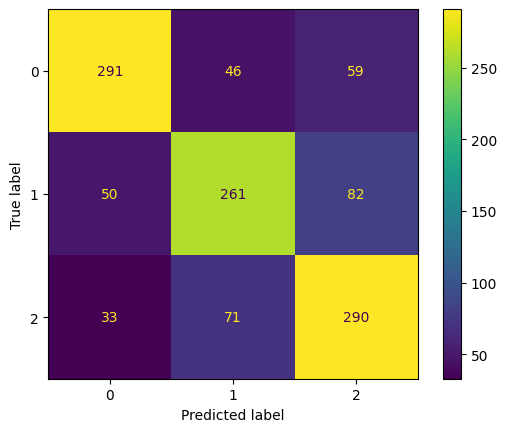

In [61]:

sklearn.metrics.ConfusionMatrixDisplay(sklearn.metrics.confusion_matrix(test_set.target, predictions)).plot()

Now we can make the matrix a bit prettier and add some lables to the matrix.

In [62]:
test_set.target_names

['sci.crypt', 'sci.electronics', 'sci.space']

In the second matrix, we normalize the matrix by true labels (row-wise normalization). Each row sums up to 1.

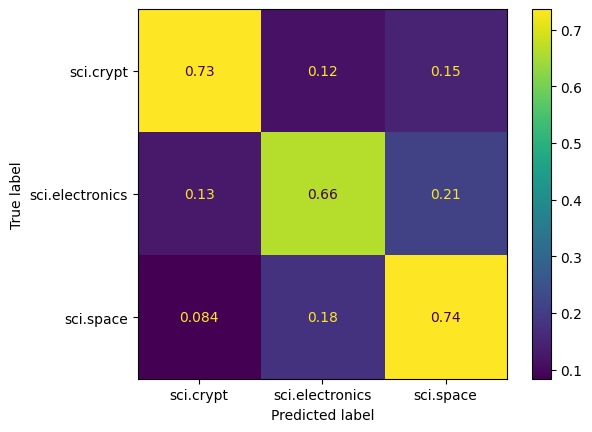

In [63]:
# Confusion matrix with normalized by
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    X=X_test,
    y=y_test,
    display_labels=test_set.target_names,
    normalize='true'
)

Now, in the third confusion matrix, we normalize by the predicted labels (column-wise normalization).

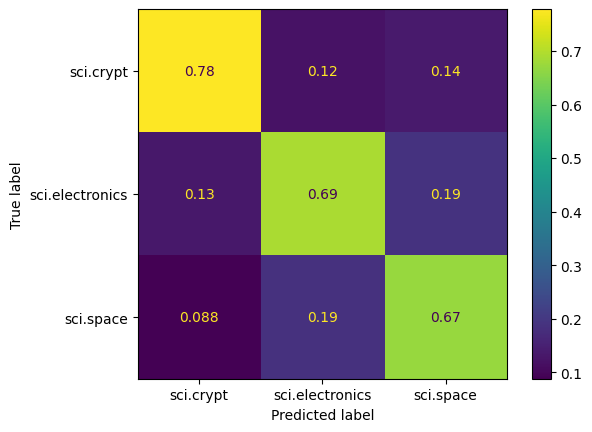

In [64]:
# Confusion matrix with normalized by prediction values
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    X=X_test,
    y=y_test,
    display_labels=test_set.target_names,
    normalize='pred'
)

And lastly we can combine the normalization and use `normalize="all"` to get a global view of class distribution in predictions.

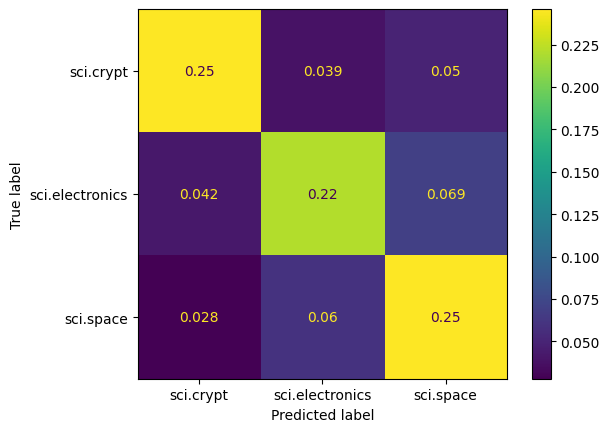

In [65]:
sklearn.metrics.ConfusionMatrixDisplay.from_estimator(
    clf,
    X=X_test,
    y=y_test,
    display_labels=test_set.target_names,
    normalize='all'
)